In [1]:
###import libraries

import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import deque
import math
import random
import time

In [2]:
###prepare environment

env = gym.make('Pong-v0')
env.reset()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       ...,

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]]

In [3]:
###understand environment

#action: 2 = up; 3 = down; all other numbers is nothing
#observation: 210 x 160 x 3 (stack of frames)

In [4]:
###visualize environment

for episode in range(3):
    print('Episode', episode+1)
    env.reset()
    while True:
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print('\tObservation:', observation)
        print('\tReward:', reward)
        print('\tDone:', done)
        print('\tInfo:', info, '\n')
        if done:
            break

env.close()

Episode 1
	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  


	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

In [5]:
###create deep learning agent

class DQNAgent:
    def __init__(self, observation_size, action_size):
        self.observation_size = observation_size
        self.action_size = action_size
        self.gamma = 0.99
        self.alpha = 0.01
        self.epsilon = 1.0
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.9999
        self.memory = deque(maxlen=2000)
        self.batch_size = 10
        self.build_model()
    
    def build_model(self):
        with tf.name_scope('inputs'):
            self.tf_observations = tf.placeholder(tf.float32, [None, self.observation_size], name='observations')
            self.tf_q_s_a = tf.placeholder(tf.float32, [None, self.action_size], name='q_s_a')
        
        with tf.name_scope('fc1'):
            fc1 = tf.contrib.layers.fully_connected(self.tf_observations, 
                                                    32, 
                                                    activation_fn=tf.nn.tanh)
        
        with tf.name_scope('fc2'):
            fc2 = tf.contrib.layers.fully_connected(fc1, 
                                                    64, 
                                                    activation_fn=tf.nn.tanh)
        
        with tf.name_scope('logits'):
            self.logits = tf.contrib.layers.fully_connected(fc2, 
                                                            self.action_size, 
                                                            activation_fn=None)
        with tf.name_scope('loss'):
            self.loss = tf.losses.mean_squared_error(self.tf_q_s_a, self.logits)
        
        with tf.name_scope('train'):
            self.optimizer = tf.train.AdamOptimizer(self.alpha).minimize(self.loss)
    
    def preprocess(self, observation):
        observation = observation[35:195] #160 x 160 x 3
        observation = observation[::2, ::2, 0] #80 x 80
        observation[observation == 144] = 0
        observation[observation == 109] = 0
        observation[observation != 0] = 1
        observation = observation.astype(np.float).ravel()
        observation = np.reshape(observation, [1, self.observation_size])
        return observation
    
    def act(self, observation):
        if np.random.rand() < self.epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(sess.run(self.logits, feed_dict={self.tf_observations: observation}))
    
    def remember(self, action, observation, new_observation, reward, done):
        self.memory.append((action, observation, new_observation, reward, done))
    
    def replay(self):
        batch = random.sample(self.memory, self.batch_size)
        observation_array = []
        target_vector_array = []
        for action, observation, new_observation, reward, done in batch:
            observation_array.append(observation[0])
            if done: target = reward
            else: target = reward + self.gamma*np.max(sess.run(self.logits, feed_dict={self.tf_observations: new_observation}))
            target_vector = sess.run(self.logits, feed_dict={self.tf_observations: observation})
            target_vector[0][action] = target
            target_vector_array.append(target_vector[0])
        _, loss = sess.run([self.optimizer, self.loss], feed_dict={self.tf_observations: np.array(observation_array), self.tf_q_s_a: np.array(target_vector_array)})
        return loss
    
    def some_stats(self, reward, agent_points, opponent_points):
        if reward > 0: agent_points += 1
        elif reward < 0: opponent_points += 1
        if self.epsilon > self.epsilon_min: self.epsilon *= self.epsilon_decay
        return agent_points, opponent_points
    
    def print_text(self, episode, G):
        print('Episode', episode+1)
        print('\tScore\t\t:', G)
        print('\tAgent Points\t:', agent_points)
        print('\tOpponent Points\t:', opponent_points)
        print('\tWon\t\t:', G > 0)
        print('\tEpsilon\t\t:', self.epsilon, '\n')

In [6]:
observation_size = 6400
action_size = env.action_space.n
agent = DQNAgent(observation_size, action_size)
n_episodes = 3
G_array, loss_array, agent_points_array, opponent_points_array, won_array = [], [], [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for episode in range(n_episodes):
        observation = env.reset()
        observation = agent.preprocess(observation)
        G = 0
        agent_points = 0
        opponent_points = 0
        while True:
            action = agent.act(observation)
            new_observation, reward, done, info = env.step(action)
            new_observation = agent.preprocess(new_observation)
            agent.remember(action, observation, new_observation, reward, done)
            if len(agent.memory) >= agent.batch_size:
                loss = agent.replay()
                loss_array.append(loss)
            agent_points, opponent_points = agent.some_stats(reward, agent_points, opponent_points)
            observation = new_observation
            G += reward
            if done:
                agent.print_text(episode, G)
                G_array.append(G)
                agent_points_array.append(agent_points)
                opponent_points_array.append(opponent_points)
                won_array.append(G > 0)
                break

W0817 00:25:06.434758 4455564736 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0817 00:25:06.731525 4455564736 deprecation.py:323] From /Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Episode 1
	Score		: -21.0
	Agent Points	: 0
	Opponent Points	: 21
	Won		: False
	Epsilon		: 0.8775630008004238 

Episode 2
	Score		: -19.0
	Agent Points	: 2
	Opponent Points	: 21
	Won		: False
	Epsilon		: 0.7715815065793316 

Episode 3
	Score		: -20.0
	Agent Points	: 1
	Opponent Points	: 21
	Won		: False
	Epsilon		: 0.68768890158004 



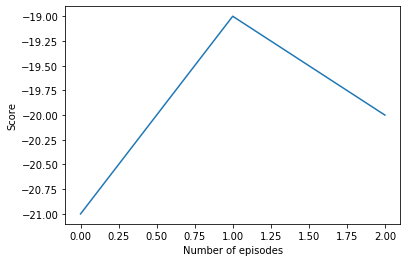

In [7]:
###get statistical results

plt.plot(G_array)
plt.xlabel('Number of episodes')
plt.ylabel('Score')
plt.show()

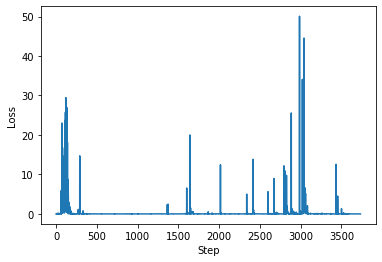

In [8]:
plt.plot(loss_array)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

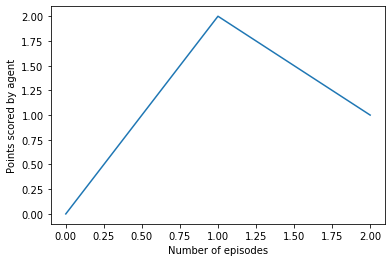

In [9]:
plt.plot(agent_points_array)
plt.xlabel('Number of episodes')
plt.ylabel('Points scored by agent')
plt.show()

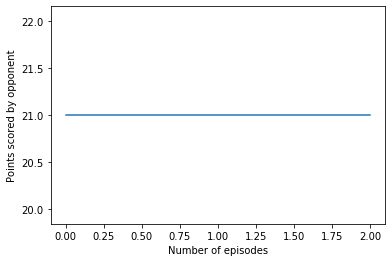

In [10]:
plt.plot(opponent_points_array)
plt.xlabel('Number of episodes')
plt.ylabel('Points scored by opponent')
plt.show()

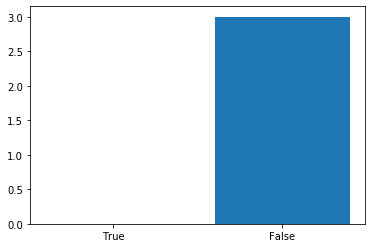

In [11]:
won_array_plot = [0, 0]
for won in won_array:
    if won: won_array_plot[0] += 1
    else: won_array_plot[1] += 1
plt.plot()
plt.bar(['True', 'False'], won_array_plot)
plt.show()